In [22]:
print("Analysis:")
print("")
print("Observed Trend 1: Temperatures are highest near the equator and decrease as you proceed towards the poles")
print("Observed Trend 2: The north pole is colder than the south pole. Probably because we are currently in the northern winter")
print("Observed Trend 3: It is least windy at the equator")
      

Analysis:

Observed Trend 1: Temperatures are highest near the equator and decrease as you proceed towards the poles
Observed Trend 2: The north pole is colder than the south pole. Probably because we are currently in the northern winter
Observed Trend 3: It is least windy at the equator


In [2]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from openweathermap import APIKEY
import pprint

In [3]:
# Generate quantity of random locations (1500, empirically determined) sufficient to yield 500 unique weather stations
Latitude = np.random.uniform(-90, 90, size=1500)
Longtitude = np.random.uniform(-180, 180, size=1500)

In [4]:
Location = {"Latitude": Latitude, "Longitude": Longtitude}
Location_df = pd.DataFrame(Location)
Location_df.head()

,Latitude,Longitude
0,29.842742,128.342468
1,10.931421,105.420889
2,-33.042394,-8.754730
3,-54.887563,-121.086507
4,35.971666,-6.453644


In [5]:
for index, row in Location_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"]).city_name
    country = citipy.nearest_city(row["Latitude"], row["Longitude"]).country_code
    Location_df.set_value(index, "City", city)
    Location_df.set_value(index, "Country", country)
len(Location_df)


1500

In [6]:
Location_df.head()

,Latitude,Longitude,City,Country
0,29.842742,128.342468,naze,jp
1,10.931421,105.420889,chau doc,vn
2,-33.042394,-8.754730,jamestown,sh
3,-54.887563,-121.086507,rikitea,pf
4,35.971666,-6.453644,conil,es


In [7]:
Location_df.drop_duplicates(subset=["City","Country"], inplace=True)
#Location_df.info()
len(Location_df)
#Location_df.head()

596

In [8]:
Location_df.head() 

,Latitude,Longitude,City,Country
0,29.842742,128.342468,naze,jp
1,10.931421,105.420889,chau doc,vn
2,-33.042394,-8.754730,jamestown,sh
3,-54.887563,-121.086507,rikitea,pf
4,35.971666,-6.453644,conil,es


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
print(str(url))

http://api.openweathermap.org/data/2.5/weather?


In [10]:
counter = 0
for index, rows in Location_df.iterrows():
    RequestURL = url + "appid=" + APIKEY + "&units=" + units + "&q=" + (rows["City"])
    Response = requests.get(RequestURL).json()
    try:
        Location_df.set_value(index, "Max Temp", Response["main"]["temp_max"])
        Location_df.set_value(index, "Humidity", Response["main"]["humidity"])
        Location_df.set_value(index, "Wind Speed", Response["wind"]["speed"])   
        Location_df.set_value(index, "Cloudiness", Response["clouds"]["all"])
        
        counter = counter + 1
        print ("Processing Record: ", counter, " of Set 1 |" , Response["name"])
        print (RequestURL)  
    except:
        continue
    #print(json.dumps(Response, indent=4, sort_keys=True))


Processing Record:  1  of Set 1 | Naze
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=naze
Processing Record:  2  of Set 1 | Chau Doc
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=chau doc
Processing Record:  3  of Set 1 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=jamestown
Processing Record:  4  of Set 1 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=rikitea
Processing Record:  5  of Set 1 | Conil
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=conil
Processing Record:  6  of Set 1 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=kaitangata
Processing Record:  7  of Set 1 | Abalak
http://api.openweathermap.org/data/2.5/

Processing Record:  54  of Set 1 | Saldanha
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=saldanha
Processing Record:  55  of Set 1 | Whitehorse
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=whitehorse
Processing Record:  56  of Set 1 | Sijunjung
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=sijunjung
Processing Record:  57  of Set 1 | Butaritari
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=butaritari
Processing Record:  58  of Set 1 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=albany
Processing Record:  59  of Set 1 | Lebu
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=lebu
Processing Record:  60  of Set 1 | College
http://api.openweatherm

Processing Record:  106  of Set 1 | Chuy
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=chuy
Processing Record:  107  of Set 1 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=kruisfontein
Processing Record:  108  of Set 1 | Ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=ketchikan
Processing Record:  109  of Set 1 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=coquimbo
Processing Record:  110  of Set 1 | Adrar
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=adrar
Processing Record:  111  of Set 1 | Mehamn
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=mehamn
Processing Record:  112  of Set 1 | Bonavista
http://api.openweath

Processing Record:  158  of Set 1 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=carnarvon
Processing Record:  159  of Set 1 | Georgetown
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=georgetown
Processing Record:  160  of Set 1 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=richards bay
Processing Record:  161  of Set 1 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=sao filipe
Processing Record:  162  of Set 1 | Torbay
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=torbay
Processing Record:  163  of Set 1 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=port hardy
Processing Record:  164  of Set 1 | Port

Processing Record:  210  of Set 1 | Vryburg
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=vryburg
Processing Record:  211  of Set 1 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=beringovskiy
Processing Record:  212  of Set 1 | Kieta
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=kieta
Processing Record:  213  of Set 1 | San Vicente
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=san vicente
Processing Record:  214  of Set 1 | Touros
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=touros
Processing Record:  215  of Set 1 | Kavieng
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=kavieng
Processing Record:  216  of Set 1 | Gizo
http://api.openwe

Processing Record:  262  of Set 1 | Shimsk
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=shimsk
Processing Record:  263  of Set 1 | Khatanga
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=khatanga
Processing Record:  264  of Set 1 | Victoria
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=victoria
Processing Record:  265  of Set 1 | French Harbor
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=french harbor
Processing Record:  266  of Set 1 | Benxi
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=benxi
Processing Record:  267  of Set 1 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=petropavlovsk-kamchatskiy
Processing Record:  268 

Processing Record:  314  of Set 1 | Deming
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=deming
Processing Record:  315  of Set 1 | Turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=turukhansk
Processing Record:  316  of Set 1 | Brits
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=brits
Processing Record:  317  of Set 1 | Nicoya
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=nicoya
Processing Record:  318  of Set 1 | Karratha
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=karratha
Processing Record:  319  of Set 1 | Vao
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=vao
Processing Record:  320  of Set 1 | Zaraza
http://api.openweathermap.org/data/

Processing Record:  366  of Set 1 | Sturgis
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=sturgis
Processing Record:  367  of Set 1 | Shirokiy
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=shirokiy
Processing Record:  368  of Set 1 | Jaszbereny
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=jaszbereny
Processing Record:  369  of Set 1 | Seymchan
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=seymchan
Processing Record:  370  of Set 1 | Gallup
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=gallup
Processing Record:  371  of Set 1 | Sur
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=sur
Processing Record:  372  of Set 1 | Tiznit
http://api.openweathermap.o

Processing Record:  419  of Set 1 | Alihe
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=alihe
Processing Record:  420  of Set 1 | Oranjestad
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=oranjestad
Processing Record:  421  of Set 1 | Hami
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=hami
Processing Record:  422  of Set 1 | Nakhon Phanom
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=nakhon phanom
Processing Record:  423  of Set 1 | Beloha
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=beloha
Processing Record:  424  of Set 1 | Parana
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=parana
Processing Record:  425  of Set 1 | Broken Hill
http://api.openwea

Processing Record:  471  of Set 1 | Talcahuano
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=talcahuano
Processing Record:  472  of Set 1 | Nabire
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=nabire
Processing Record:  473  of Set 1 | Gorontalo
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=gorontalo
Processing Record:  474  of Set 1 | Nizhniy Ingash
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=nizhniy ingash
Processing Record:  475  of Set 1 | Hirara
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=hirara
Processing Record:  476  of Set 1 | Boyolangu
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=boyolangu
Processing Record:  477  of Set 1 | Makakilo C

Processing Record:  523  of Set 1 | Viloco
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=viloco
Processing Record:  524  of Set 1 | Rio Gallegos
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=rio gallegos
Processing Record:  525  of Set 1 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=guerrero negro
Processing Record:  526  of Set 1 | Aquiraz
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=aquiraz
Processing Record:  527  of Set 1 | La Libertad
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=la libertad
Processing Record:  528  of Set 1 | Juneau
http://api.openweathermap.org/data/2.5/weather?appid=95cca715ee032b80d55ce5180e93a46c&units=imperial&q=juneau
Processing Record:  529  of Set 1 | Boa Vi

In [11]:
Location_df.head()

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness
0,29.842742,128.342468,naze,jp,74.74,93.0,7.45,44.0
1,10.931421,105.420889,chau doc,vn,85.99,76.0,7.34,0.0
2,-33.042394,-8.754730,jamestown,sh,64.84,93.0,13.04,24.0
3,-54.887563,-121.086507,rikitea,pf,79.51,100.0,15.95,48.0
4,35.971666,-6.453644,conil,es,23.44,88.0,5.21,76.0


In [12]:
len(Location_df)

596

In [13]:
# Export file as a CSV
Location_df.to_csv("WeatherPy_out.csv", index=False, header=True)

In [14]:
now = datetime.datetime.now()

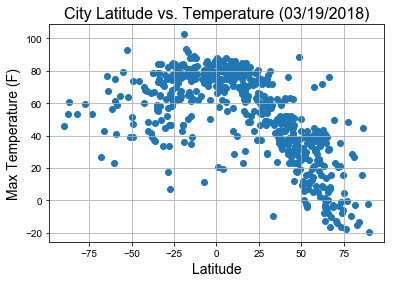

In [15]:
#Latitude vs. Temperature Plot

plt.scatter(pd.to_numeric(Location_df["Latitude"]), pd.to_numeric(Location_df["Max Temp"]))
sns.set()
plt.grid(True)
plt.title(f"City Latitude vs. Temperature ({now.strftime('%m/%d/%Y')})", fontsize=16)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.show()

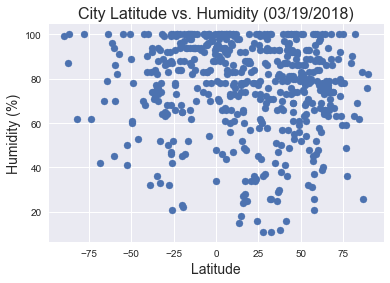

In [16]:
#Latitude vs. Humidity Plot

plt.scatter(pd.to_numeric(Location_df["Latitude"]), pd.to_numeric(Location_df["Humidity"]))
sns.set()
plt.grid(True)
plt.title(f"City Latitude vs. Humidity ({now.strftime('%m/%d/%Y')})", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.show()

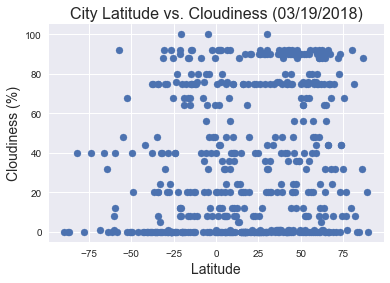

In [17]:
#Latitude vs. Cloudiness Plot

plt.scatter(pd.to_numeric(Location_df["Latitude"]), pd.to_numeric(Location_df["Cloudiness"]))
sns.set()
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness ({now.strftime('%m/%d/%Y')})", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.show()

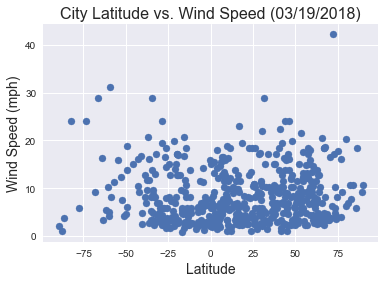

In [18]:
#Latitude vs. Wind Speed Plot

plt.scatter(pd.to_numeric(Location_df["Latitude"]), pd.to_numeric(Location_df["Wind Speed"]))
sns.set()
plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed ({now.strftime('%m/%d/%Y')})", fontsize=16)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.show()